The following is an analysis of the classification of rock, paper, scissors image data. The analysis used to classify the image data is using CNN.

# Importing Libraries

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import platform
import datetime
import os
import math
import random
import zipfile
import urllib.request
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split

In [ ]:
try:
    %tensorflow_version 2.x
except:
    pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.7.13
Tensorflow version: 2.8.2
Keras version: 2.8.0


# Dataset

In [ ]:
# !wget --no-check-certificate \
#     https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip \
#     -o /tmp/rockpaperscissors.zip

In [ ]:
data_url = 'https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip'
urllib.request.urlretrieve(data_url, 'rockpaperscissors.zip')
local_file = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_file, 'r')
zip_ref.extractall('data/')
zip_ref.close()

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
base_dir='data/rockpaperscissors/rps-cv-images'
splitfolders.ratio(base_dir, output='data/rockpaperscissors', seed=1337, ratio = (.6, .4))

train_dir= os.path.join('data/rockpaperscissors','train')
validation_dir= os.path.join('data/rockpaperscissors','val')

Copying files: 2188 files [00:00, 2570.49 files/s]


In [ ]:
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

# Train Test Split

In [ ]:
train_rock=os.path.join(train_dir, 'rock')
train_paper=os.path.join(train_dir, 'paper')
train_scissors=os.path.join(train_dir, 'scissors')
validation_rock=os.path.join(validation_dir, 'rock')
validation_paper=os.path.join(validation_dir, 'paper')
validation_scissors=os.path.join(validation_dir, 'scissors')

In [ ]:
train_rock , val_rock = train_test_split(os.listdir (rock_dir), test_size=0.4)
train_paper , val_paper = train_test_split(os.listdir (paper_dir), test_size=0.4)
train_scissors , val_scissors = train_test_split(os.listdir (scissors_dir), test_size=0.4)

# ImageDataGenerator to Preprocess image and Augmentasi Image

In [ ]:
train_datagen = ImageDataGenerator(
                          rescale = 1./255.,
                          rotation_range=20,
                          horizontal_flip = True,
                          shear_range = 0.2,
                          fill_mode = 'nearest')
test_datagen = ImageDataGenerator(
                          rescale = 1./255.)

In [ ]:
train_generator=train_datagen.flow_from_directory(
                                                      train_dir,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

test_generator=test_datagen.flow_from_directory(
                                                      validation_dir,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


# Build and Training Model with CNN

In [ ]:
model=tf.keras.models.Sequential([
                      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
                      tf.keras.layers.MaxPooling2D(2,2),
                      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                      tf.keras.layers.MaxPooling2D(2,2), 
                      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                      tf.keras.layers.MaxPooling2D(2,2), 
                      # Flatten the results to feed into a DNN
                      tf.keras.layers.Flatten(), 
                      # 512 neuron hidden layer
                      tf.keras.layers.Dense(512, activation='relu'), 
                      # end with 3 Neuron Dense, activated by softmax
                      tf.keras.layers.Dense(3, activation='softmax')
    ])
model.compile(optimizer='adam',
    # optimizer=RMSprop(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics=['accuracy']) 
history = model.fit(train_generator,
                            validation_data=test_generator,
                            steps_per_epoch=25,
                            validation_steps=5,
                            epochs=10,
                            verbose=1
                            )

Epoch 1/10
25/25 [==============================] - 34s 1s/step - loss: 1.0735 - accuracy: 0.4238 - val_loss: 0.9270 - val_accuracy: 0.5813
Epoch 2/10
25/25 [==============================] - 24s 938ms/step - loss: 0.8288 - accuracy: 0.6513 - val_loss: 0.6834 - val_accuracy: 0.7312
Epoch 3/10
25/25 [==============================] - 23s 901ms/step - loss: 0.6883 - accuracy: 0.7287 - val_loss: 0.7283 - val_accuracy: 0.7250
Epoch 4/10
25/25 [==============================] - 24s 945ms/step - loss: 0.5442 - accuracy: 0.8062 - val_loss: 0.4641 - val_accuracy: 0.8062
Epoch 5/10
25/25 [==============================] - 23s 897ms/step - loss: 0.3799 - accuracy: 0.8550 - val_loss: 0.2794 - val_accuracy: 0.9062
Epoch 6/10
25/25 [==============================] - 24s 952ms/step - loss: 0.2601 - accuracy: 0.9100 - val_loss: 0.2719 - val_accuracy: 0.9125
Epoch 7/10
25/25 [==============================] - 23s 900ms/step - loss: 0.1848 - accuracy: 0.9413 - val_loss: 0.1858 - val_accuracy: 0.9500
Ep

In [ ]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()

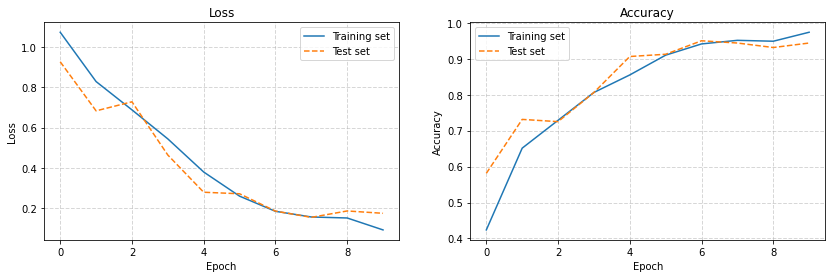

In [ ]:
render_training_history(history)